<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning-Notes/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron:


         x1 ----\
                 \
         x2 ----->( ∑ weights + bias ) ---> Activation ---> Output (0 or 1)
                 /
         xn ----/




## 1. Introduction
- The Perceptron is the simplest type of artificial neural network.
- Developed by Frank Rosenblatt in 1958.
- Used for binary classification tasks.
- Forms the foundation of deep neural networks.

---

## 2. Perceptron Model

- Inputs: \( x_1, x_2, ..., x_n \)
- Weights: \( w_1, w_2, ..., w_n \)
- Bias: \( b \)

**Net input (linear combination):**
\[
z = \sum_{i=1}^{n} w_i x_i + b
\]

**Output:**
\[
y = f(z)
\]

---

## 3. Activation Function

Basic perceptron uses the step function:
\[
f(z) = \begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{if } z < 0
\end{cases}
\]

Other commonly used functions:
- Sigmoid: \( \sigma(z) = \frac{1}{1 + e^{-z}} \)
- ReLU: \( f(z) = \max(0, z) \)
- Tanh: \( \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}} \)

---

## 4. Perceptron Learning Rule

- Learning Rate (η): Small constant (e.g., 0.01)
- Target label: \( y_{true} \)
- Predicted label: \( y_{pred} \)

**Weight update**

**Bias update**


Repeat over multiple epochs.

---

## 5. Geometric Interpretation

- Perceptron tries to find a hyperplane:
\[
w^T x + b = 0
\]
- Separates data into two classes.
- Works only for linearly separable data.

---

## 6. Limitations

- Cannot solve problems like XOR (not linearly separable).

Works for:
- AND
- OR
- NOT

Fails for:
- XOR

---

## 7. Solution: Multilayer Perceptron (MLP)

- Add hidden layers and use non-linear activation.
- Train using backpropagation and gradient descent.
- Can learn complex, non-linear decision boundaries.

---

## 8. Summary Table

| Feature        | Value                          |
|----------------|--------------------------------|
| Model Type     | Binary Classifier              |
| Input          | Feature vector                 |
| Output         | 0 or 1                         |
| Learning       | Supervised                     |
| Rule           | Perceptron update rule         |
| Limitation     | Only linear separability       |
| Foundation of  | Deep Neural Networks (DNNs)    |

---


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/placement.csv')

In [3]:
print(df.shape)
df.head()

(100, 3)


cgpa  resume_score  placed
0  8.14          6.52       1
1  6.17          5.17       0
2  8.27          8.86       1
3  6.88          7.27       1
4  7.52          7.30       1

<Axes: xlabel='cgpa', ylabel='resume_score'>

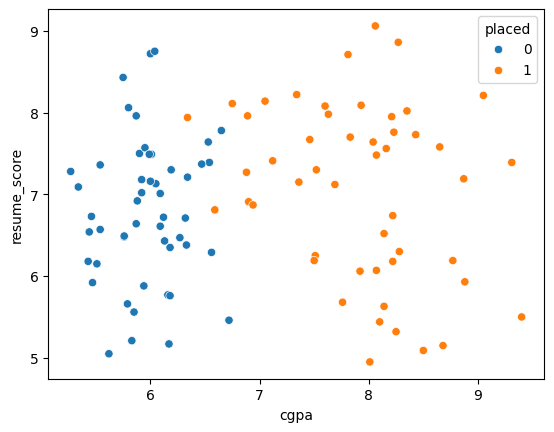

In [5]:
sns.scatterplot(x=df['cgpa'], y=df['resume_score'], hue=df['placed'])

In [6]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [8]:
p.fit(X,y)

Perceptron()

In [9]:
p.coef_

array([[ 40.26, -36.  ]])

In [10]:
p.intercept_

array([-25.])

In [11]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

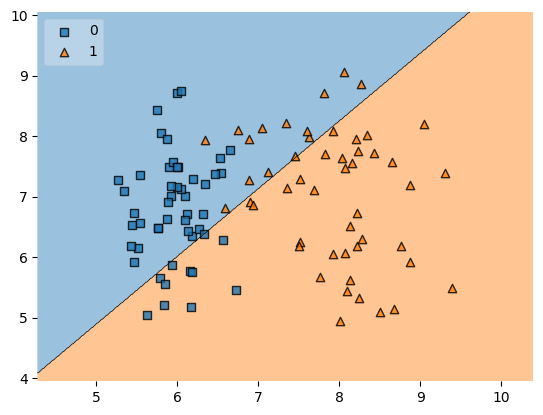

In [12]:
plot_decision_regions(X.values, y.values, clf=p, legend=2)




---


# Perceptron Trick

---



In [14]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)


In [15]:
import matplotlib.pyplot as plt

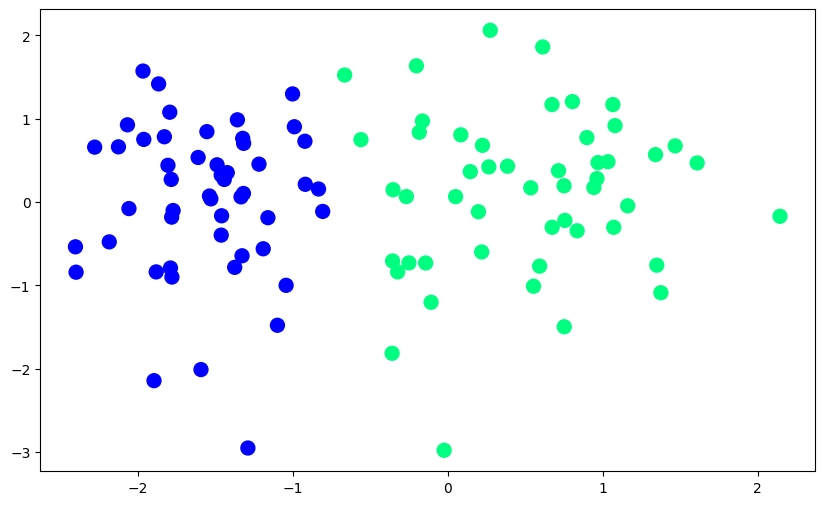

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [17]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [18]:
def step(z):
    return 1 if z>0 else 0

In [19]:
intercept_,coef_ = perceptron(X,y)

In [20]:
print(coef_)

[1.31197567 0.17840342]


In [21]:
print(intercept_)

1.0


In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [23]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

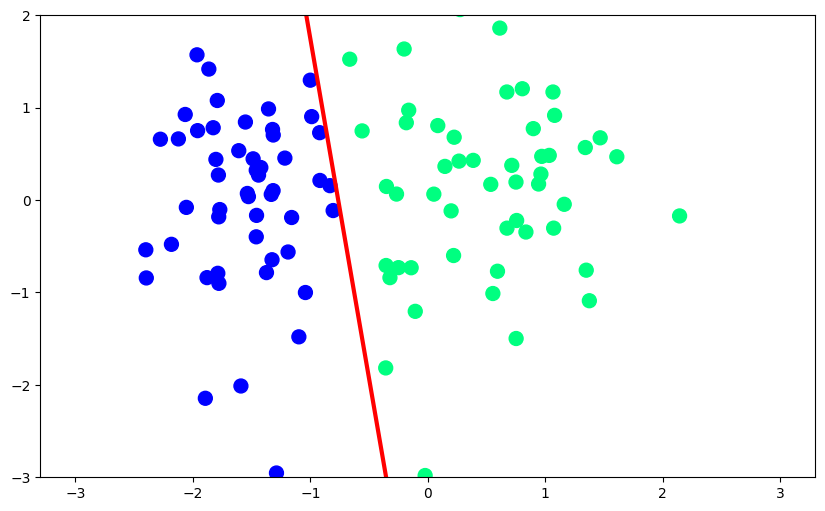

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)



---


# Perceptron Loss Function:

---



In [30]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

In [31]:
X.shape

(100, 2)

In [32]:
y.shape

(100,)

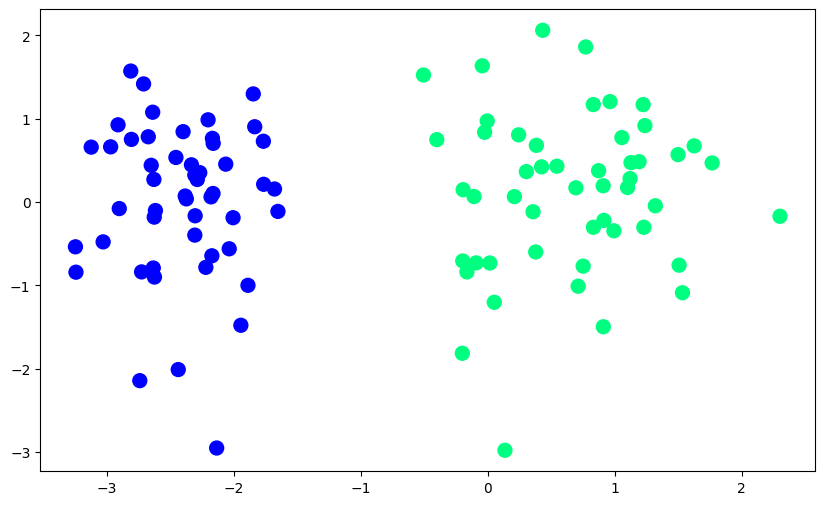

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [34]:
def perceptron(X,y):

    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b

In [35]:
w1,w2,b = perceptron(X,y)

In [36]:
b

np.float64(1.3000000000000003)

In [37]:
m = -(w1/w2)
c = -(b/w2)

In [38]:
print(m,c)

-4.531321834268464 -5.851870329508209


(-3.0, 2.0)

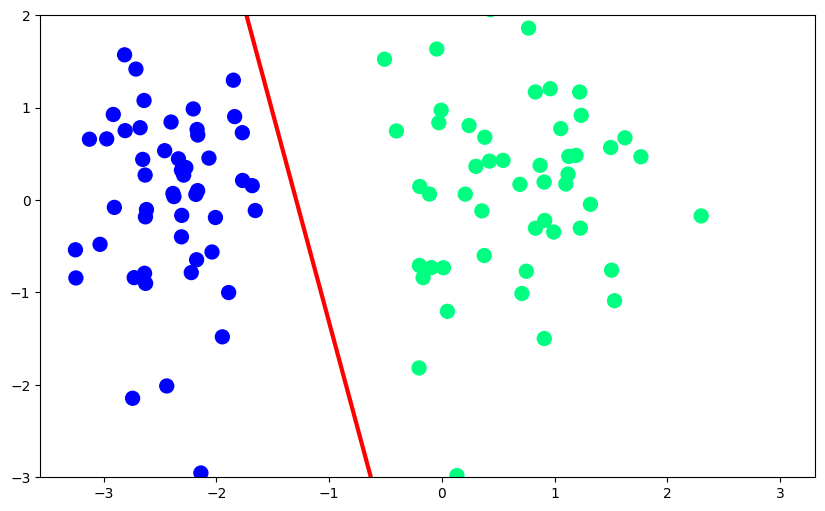

In [39]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Problem with Perceptron:

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()

In [52]:
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]

In [53]:
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]

In [54]:
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]

In [55]:
and_data

input1  input2  ouput
0       1       1      1
1       1       0      0
2       0       1      0
3       0       0      0

<Axes: xlabel='input1', ylabel='input2'>

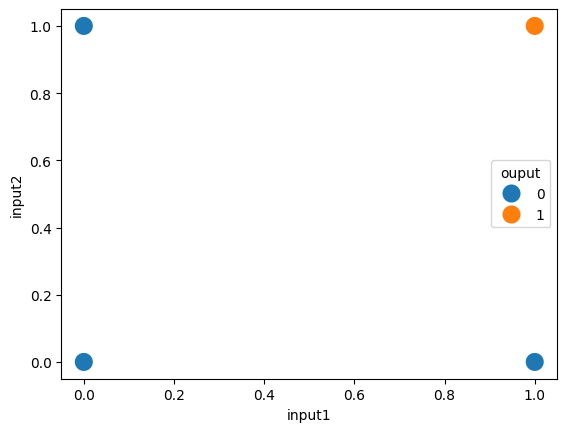

In [56]:
sns.scatterplot(x=and_data['input1'], y=and_data['input2'], hue=and_data['ouput'], s=200)

In [57]:
or_data

input1  input2  ouput
0       1       1      1
1       1       0      1
2       0       1      1
3       0       0      0

<Axes: xlabel='input1', ylabel='input2'>

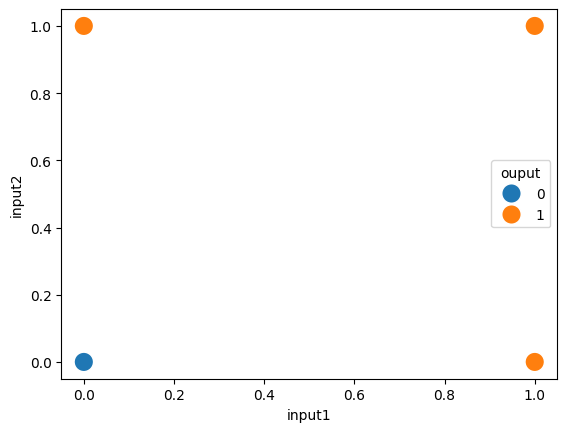

In [59]:
sns.scatterplot(x=or_data['input1'], y=or_data['input2'], hue=or_data['ouput'], s=200)

In [60]:
xor_data

input1  input2  ouput
0       1       1      0
1       1       0      1
2       0       1      1
3       0       0      0

<Axes: xlabel='input1', ylabel='input2'>

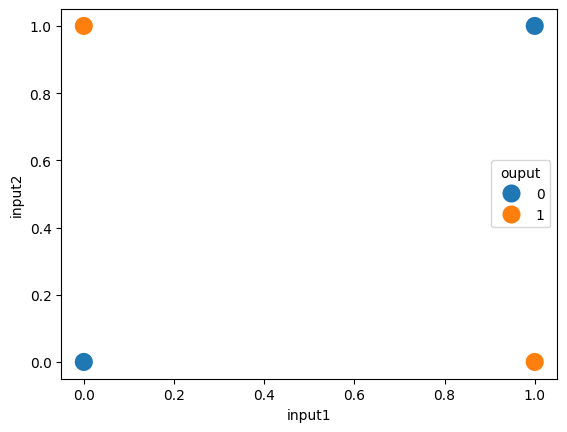

In [61]:
sns.scatterplot(x=xor_data['input1'],y=xor_data['input2'],hue=xor_data['ouput'],s=200)

In [62]:
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()

In [63]:
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)

Perceptron()

In [64]:
clf1.coef_

array([[2., 2.]])

In [65]:
clf1.intercept_

array([-2.])

In [66]:
x=np.linspace(-1,1,5)
y=-x+1

<Axes: xlabel='input1', ylabel='input2'>

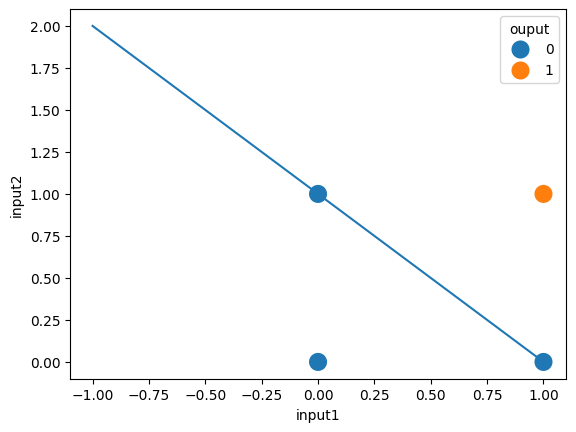

In [68]:
plt.plot(x,y)
sns.scatterplot(x=and_data['input1'],y=and_data['input2'],hue=and_data['ouput'],s=200)

In [69]:
clf2.coef_

array([[2., 2.]])

In [70]:
clf2.intercept_

array([-1.])

In [71]:
x1=np.linspace(-1,1,5)
y1=-x+0.5

<Axes: xlabel='input1', ylabel='input2'>

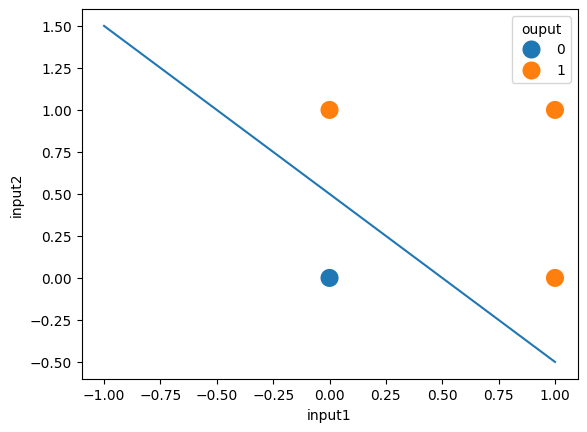

In [73]:
plt.plot(x1,y1)
sns.scatterplot(x=or_data['input1'],y=or_data['input2'],hue=or_data['ouput'],s=200)

In [74]:
clf3.coef_

array([[0., 0.]])

In [75]:
clf3.intercept_

array([0.])

<Axes: >

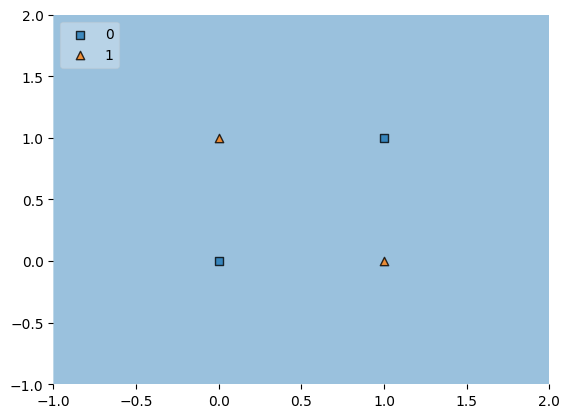

In [76]:
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values, clf=clf3, legend=2)